## Logistic Regression

**Logistic Regression** is a parametric method for classification, $Y_i\in \{0,1\}$ is binary. For a $k$-dimensional covariate $X$, we have
$$p_i(\theta)\equiv\mathbb{P}(Y_i=1\mid X=x)=\frac{e^{\theta_0+\sum_{j=1}^k\theta_jx_{ij}}}{1+e^{\theta_0+\sum_{j=1}^k\theta_jx_{ij}}}$$

The data $Y_i\mid X_i\sim Bernoulli(p_i)$ for $Y_i$'s are binary. Hence the **Likelihood function** is
$$\mathcal{L}(\theta)=\prod_{i=1}^np_i(\theta)^{Y_i}(1-p_i(\theta))^{1-Y_i}$$

Take **log-likelihood** $\ell(\theta)=\log \mathcal{L}(\theta)$, we have to maximize $\ell(\theta)$. And

$$\ell(\theta)=\log \mathcal{L}(\theta)=\sum_{i=1}^my^{(i)}\log p(x^{(i)})+(1-y^{(i)})\log(1-p(x^{(i)}))$$

Take partial derivative

\begin{align}
\frac{\partial}{\partial\theta_j}\ell(\theta)&=\left(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac{1}{1-g(\theta^Tx^{(i)})}\right)\frac{\partial}{\partial\theta_j}g(\theta^Tx^{(i)})\\&=\left(y^{(i)}\frac{1}{g(\theta^Tx^{(i)})}-(1-y^{(i)})\frac{1}{1-g(\theta^Tx^{(i)})}\right)g(\theta^Tx^{(i)})(1-g(\theta^Tx^{(i)}))\frac{\partial}{\partial\theta_j}(\theta^Tx^{(i)})\\&=\left(y^{(i)}(1-g(\theta^Tx^{(i)}))-(1-y^{(i)})g(\theta^Tx^{(i)})\right)x_j^{(i)}\\
\end{align}

Then $$\frac{\partial}{\partial\theta_j}\ell(\theta)=\left(y^{(i)}-p_{\theta}(x^{(i)})\right)x_j^{(i)}$$

Iteration format

$$\theta_{j}:=\theta_j+\alpha\left(y^{(i)}-p_{\theta}(x^{(i)})\right)x_j^{(i)}$$

## Multinomial Logistic Regression

Multinomial logistic regression is a classification method that generalizes logistic regression to the multiclass problems. It has the form

$$p(y=c\mid\mathbf{x},\mathbf{W})=\frac{\exp{(\mathbf{w}_c^T\mathbf{x})}}{\sum_{k=1}^C\exp{(\mathbf{w}_k^T\mathbf{x})}}$$

where $C$ is the number of classes, and $\mathbf{W}$ is a $C\times(d+1)$ weight matrix, and $d$ is the dimension of input vector $\mathbf{x}$.

Let $\mu_{ic}=\mathbb{P}(y_i=c\mid \mathbf{x}_i,\mathbf{W})$, $y_{ic}=\mathbb{I}\{y_i=c\}$. In this scenario, the model can be defined as 

$$\mu_{ic}=\mathbb{P}(y_i=c\mid \mathbf{x}_i,\mathbf{W})=\frac{\exp{(\mathbf{w}_c^T\mathbf{x})}}{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x})}}$$

We can write log-likelihood as:

\begin{align*}
\ell(\mathbf{W})&=\log{\prod_{i=1}^n\prod_{c=1}^C\mu_{ic}^{y_{ic}}}\\
&=\sum_{i=1}^n\sum_{c=1}^Cy_{ic}\log{\mu_{ic}}\\
&=\sum_{i=1}^n\sum_{c=1}^Cy_{ic}\log{\frac{\exp{(\mathbf{w}_c^T\mathbf{x})}}{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x})}}}\\
&=\sum_{i=1}^n\sum_{c=1}^Cy_{ic}\big(\mathbf{w}_c^T\mathbf{x}_i-\log{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\big)\\
&=\sum_{i=1}^n\big(\sum_{c=1}^Cy_{ic}\mathbf{w}_c^T\mathbf{x}_i-\log{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\big)
\end{align*}

To maximize the log-likelihood, we need the gradient and even Hessian of $\ell(\mathbf{W})$

\begin{align*}
\nabla_\mathscr{C}\ell(\mathbf{W})&=\sum_{i=1}^n\big(\frac{\partial}{\partial\mathbf{w}_\mathscr{C}}\sum_{c=1}^Cy_{ic}\mathbf{w}_c^T\mathbf{x}_i-\frac{\partial}{\partial\mathbf{w}_\mathscr{C}}\log{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\big)\\
&=\sum_{i=1}^ny_{i\mathscr{C}}\mathbf{x}_i-\frac{\frac{\partial}{\partial\mathbf{w}_\mathscr{C}}\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\\
&=\sum_{i=1}^ny_{i\mathscr{C}}\mathbf{x}_i-\frac{\exp{(\mathbf{w}_{\mathscr{C}}^T\mathbf{x}_i)}\mathbf{x}_i}{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\\
&=\sum_{i=1}^n\big(y_{i\mathscr{C}}-\mu_{i\mathscr{C}}\big)\mathbf{x}_i
\end{align*}

Then the Hessian matrix is

\begin{align*}
\nabla_{\mathscr{C}'}\nabla_\mathscr{C}\ell(\mathbf{W})&=\frac{\partial}{\partial\mathbf{w}_{\mathscr{C}'}}\sum_{i=1}^n\big(y_{i\mathscr{C}}-\mu_{i\mathscr{C}}\big)\mathbf{x}_i\\
&= -\sum_{i=1}^n\frac{\partial}{\partial\mathbf{w}_{\mathscr{C}'}}\frac{\exp{(\mathbf{w}_{\mathscr{C}}^T\mathbf{x}_i)}\mathbf{x}_i}{\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}}\\
&=-\sum_{i=1}^n\frac{\delta_{\mathscr{C}\mathscr{C}'}\exp{(\mathbf{w}_{\mathscr{C}}^T\mathbf{x}_i)}\mathbf{x}_i\mathbf{x}_i^T\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}-\exp{(\mathbf{w}_{\mathscr{C}}^T\mathbf{x}_i)}\mathbf{x}_i\mathbf{x}_i^T\exp{(\mathbf{w}_{\mathscr{C}'}^T\mathbf{x}_i)}}{\big(\sum_{c'=1}^C\exp{(\mathbf{w}_{c'}^T\mathbf{x}_i)}\big)^2}\\
&=-\sum_{i=1}^n\big(\delta_{\mathscr{C}\mathscr{C}'}\mu_{i\mathscr{C}'}-\mu_{i\mathscr{C}}\mu_{i\mathscr{C}'}\big)\mathbf{x}_i\mathbf{x}_i^T\\
&=\sum_{i=1}^n\mu_{i\mathscr{C}'}\big(\mu_{i\mathscr{C}}-\delta_{\mathscr{C}\mathscr{C}'}\big)\mathbf{x}_i\mathbf{x}_i^T
\end{align*}

where $\delta_{\mathscr{C}\mathscr{C}'}$ is the Dirac delta function and is equal to $1$ if $\mathscr{C}=\mathscr{C}'$ and $0$ otherwise.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [2]:
def shuffle(X, y):
    '''
    Randomize the order of sample.

    Parameters
    ----------
    X : array-like, shape = [num_observations, num_features]
        Design matrix

    y : array-like, shape = [num_observations]
        Output for `X`

    Returns
    -------
    A tuple consists of `X_shuffle` and `y_shuffle`

    X_shuffle : array, shape = [num_observations, num_features]
        The design matrix after shuffling

    y_shuffle : array shape = [num_observations]
        The output for `X_shuffle`
    '''
    randomize = np.arange(len(y))
    # Create a random order
    np.random.shuffle(randomize)
    # Shuffle original dataset
    X_shuffle = X[randomize]
    y_shuffle = y[randomize]
    return X_shuffle, y_shuffle

In [3]:
class LogisticRegression(object):
    
    def __init__(self):
        self.loss_collection = []
    
    def train(self, X, y, learning_rate = 0.01, regularization_coefficient = 0.1, maxCycle = 1000):
        self.X = self._add_intercept(X) 
        self.y = y 
        self.weights = np.zeros(self.X.shape[-1])
        self.regularization_coefficient = regularization_coefficient
        temp = np.inf * np.ones_like(self.weights)
        for i in range(maxCycle):
            a = self._sigmoid(np.dot(self.X, self.weights))
            self.loss_collection.append(self._get_loss(a))
            temp = self.weights.copy()
            self.weights += learning_rate * (1.0 /len(self.X) * np.dot(self.X.T, 
                                                          (self.y - a)) - 2 * self.regularization_coefficient * self.weights)
            self.weights[0] = (1 + 2 * learning_rate * self.regularization_coefficient) * self.weights[0]
            
    def _add_intercept(self, X):
            return np.hstack(((np.ones(X.shape[0])).reshape((-1, 1)), X))
        
    def _sigmoid(self, x):
        return 0.5 * (1 + np.tanh(0.5 * x))
    
    def _get_loss(self, a):
        return -1.0 / len(self.X) * (np.dot(self.y, np.log(a)) + np.dot(1 - self.y, np.log(1 - a))) + \
               self.regularization_coefficient * np.linalg.norm(self.weights[1: ]) ** 2
    def plot_loss(self):
        plt.plot(self.loss_collection)
    def predict(self, X, threshold = 0.5):
        X = self._add_intercept(X)
        return np.array(self._sigmoid(np.dot(X, self.weights)) > threshold, dtype = np.int16)

In [4]:
class MultinomialLogistic:
    
    def __init__(self, regularization_coefficient = 1):
        self.loss_collection = []
        self.regularization_coefficient = regularization_coefficient
    # implement of the gradient acsent
    def training(self, X, y, alpha = 0.001, maxCycles = 500, intercept = True):
        self.X = self.add_intercept(X)
        self.Y = self.one_hot_encoding(y)
        # construct the weights matrix with shape of features by classes
        self.weights = np.random.randn(self.X.shape[-1], self.Y.shape[-1])
        for t in range(maxCycles):
            self.weights[:, 0] = self.weights[:, 0].copy() * (1 + 1.0 / len(self.X) * alpha * self.regularization_coefficient)
            self.weights = self.weights + 1.0 / len(self.X) * alpha * (self.gradient() - \
                           self.regularization_coefficient * self.weights)
            self.loss_collection.append(self.compute_loss())
        return "Training done successfully"
        
        
    def gradient(self):
        z = np.dot(self.X, self.weights)
        sigma = self.softmax(z)
        grad = np.dot(self.X.T, self.Y - sigma)
        return grad
    
    
    def one_hot_encoding(self, y):
        len_labels = len(np.unique(y))
        Y = np.zeros((len(y), len_labels))
        np.ma.put(Y, indices = y + np.arange(0, len(y) * len_labels, len_labels), values = 1)
        return Y
    
    def softmax(self, z):
        z = z - np.max(z, axis = 1, keepdims = True)
        z = np.exp(z)
        z = z / np.sum(z, axis = 1, keepdims = True) 
        return z
    
    def add_intercept(self, X):
        if X.ndim > 1:
            return np.hstack(((np.ones(X.shape[0])).reshape((-1, 1)), X))
        if X.ndim == 1:
            return np.hstack((1, X))
        
    def compute_loss(self):
        z = np.dot(self.X, self.weights)
        loss = -np.sum(self.Y * np.log(self.softmax(z)))
        return loss / len(self.X)
    
    def plot_loss(self):
        plt.plot(self.loss_collection)
    
    def predict(self, X):
        X = self.add_intercept(X)
        z = np.dot(X, self.weights)
        if X.ndim > 1:
            return np.argmax(z, axis = 1)
        elif X.ndim == 1:
            return np.argmax(z)
        else:
            raise ValueError

In [5]:
X, y = datasets.make_classification(n_samples = 5000, n_classes = 4, n_informative=4, n_clusters_per_class=1)

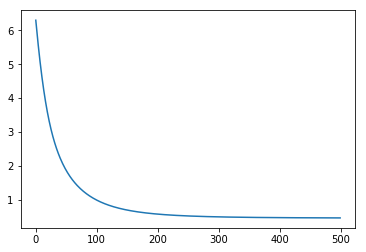

In [6]:
learning_rate = 10**-5
classifier = MultinomialLogistic(regularization_coefficient = 0)
classifier.training(X, y, alpha = 0.1, maxCycles = 500)
classifier.plot_loss()

In [7]:
(classifier.predict(X) == y).sum() * 1.0 / len(y)

0.855

# Learning rates

d:\python\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


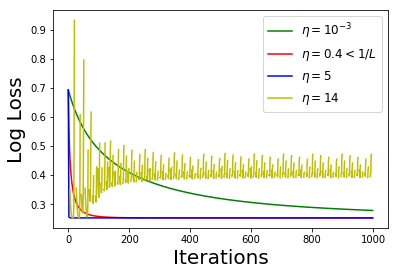

In [8]:
X, y = datasets.make_classification(n_samples = 5000)
X, y = shuffle(X, y)

regularization_coefficient = 0
maxCycle = 1500

learning_rate_1 = 1.0 / (np.linalg.norm(X, 2) ** 2 / len(X) + regularization_coefficient)
learning_rate_2 = 10e-3
learning_rate_3 = 5
learning_rate_4 = 14

classifier_1 = LogisticRegression()
classifier_1.train(X, y, learning_rate = learning_rate_1, regularization_coefficient = regularization_coefficient, 
                   maxCycle =maxCycle)

classifier_2 = LogisticRegression()
classifier_2.train(X, y, learning_rate = learning_rate_2, regularization_coefficient = regularization_coefficient, 
                   maxCycle = maxCycle)

classifier_3 = LogisticRegression()
classifier_3.train(X, y, learning_rate = learning_rate_3, regularization_coefficient = regularization_coefficient, 
                   maxCycle = maxCycle)

classifier_4 = LogisticRegression()
classifier_4.train(X, y, learning_rate = learning_rate_4, regularization_coefficient = regularization_coefficient, 
                   maxCycle = maxCycle)

num = 1000
fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(111)
ax.plot(classifier_2.loss_collection[:num], 'g', label = '$\eta=10^{-3}$')
ax.plot(classifier_1.loss_collection[:num], 'r', label = '$\eta=0.4<1/L$')
ax.plot(classifier_3.loss_collection[:num], 'b', label = '$\eta=5$')
ax.plot(classifier_4.loss_collection[:num], 'y', label = '$\eta=14$')
ax.set_xlabel("Iterations", fontsize = 20)
ax.set_ylabel("Log Loss", fontsize = 20)

ax.legend(fontsize = 12)

In [9]:
data = datasets.load_digits()
N_total = 1700
N_features = 64
N_train = 1500
x = np.zeros((N_total, N_features))
for i in range(N_total):
    x[i] = data.images[i].flatten()
y = data.target[:N_train]
clf = MultinomialLogistic()
clf.training(x[:N_train],y, alpha = 0.005, maxCycles=500)

'Training done successfully'

Text(0.5,0.98,'Result of Multinomial Logistic Regression on MNIST digits dataset')

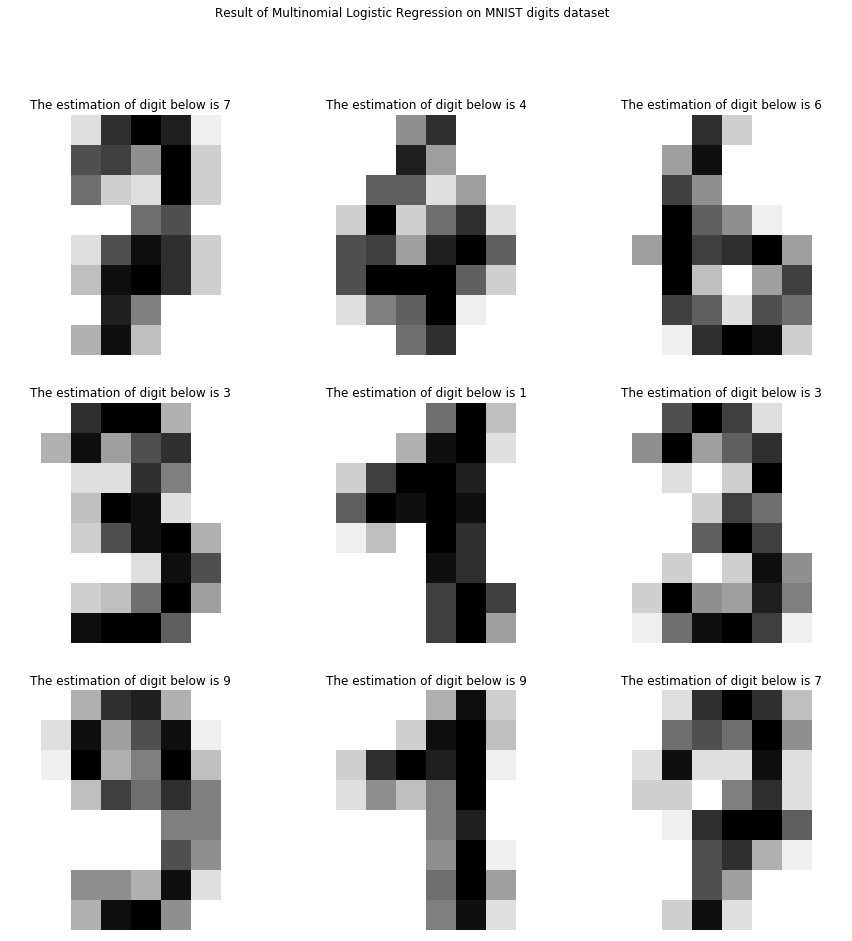

In [10]:
fig = plt.figure(figsize= (15,15))
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)
    ax.imshow(data.images[N_train + i], cmap="binary")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("The estimation of digit below is " + str(clf.predict(x[N_train + i])))
fig.suptitle("Result of Multinomial Logistic Regression on MNIST digits dataset")